In [1]:
import numpy as np # for numeric calculation
import pandas as pd # for data analysis and manupulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from dateutil import parser # convert time in date time data type
import time

In [2]:
dataset = pd.read_csv("D:/mallikarjuna/ML_Projects/app/newappdata10.csv")

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,saving_count,credit_screens_count,cc_screens_count,loan_screens_count
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,0,...,0,0,0,0,0,5,0,0,0,1
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,0,...,0,0,0,0,0,6,0,3,0,1
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,1,...,0,0,0,0,0,10,0,2,0,1


In [4]:
dataset = dataset.drop(columns = ['first_open'])

# data processing

In [5]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,saving_count,credit_screens_count,cc_screens_count,loan_screens_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [6]:
response = dataset['enrolled']
dataset = dataset.drop(columns = ['enrolled'])

In [7]:
from sklearn.model_selection import train_test_split


In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size = .2, random_state =  0)

In [9]:
X_train


,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,saving_count,credit_screens_count,cc_screens_count,loan_screens_count
20330,315793,2,20,32,5,0,1,1,0,0,...,0,0,0,0,0,2,0,0,0,2
17532,103347,1,21,22,42,1,0,0,1,1,...,0,0,0,0,0,13,0,1,0,1
45819,373340,0,4,26,85,1,0,0,0,1,...,0,0,0,0,0,10,0,2,1,2
34807,324006,4,13,25,24,1,0,0,1,0,...,0,0,0,0,0,10,0,0,0,1
31888,248759,3,16,50,11,0,0,0,1,0,...,0,0,0,0,0,3,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,312924,5,23,19,6,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
45891,291893,0,15,22,4,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
42613,221546,3,6,25,43,0,0,0,0,1,...,0,0,0,0,0,4,6,0,0,0
43567,116320,4,13,27,4,1,0,1,0,0,...,0,0,0,0,0,2,0,0,0,0


In [10]:
train_identifier = X_train['user']
X_train = X_train.drop(columns = ['user'])

In [29]:
test_identifier = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [30]:
from sklearn.preprocessing import StandardScaler


In [31]:
sc_X = StandardScaler()

In [32]:

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))


In [33]:
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

In [34]:
X_train2.columns = X_train.columns.values

In [35]:
X_test2.columns = X_test.columns.values

In [36]:
X_test2.index = X_test.index.values

In [37]:
X_train2.index = X_train.index.values

In [38]:
X_train = X_train2
X_test = X_test2

# model building

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
classifier = LogisticRegression(random_state = 0, penalty = 'l2')

In [41]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [42]:
y_pred = classifier.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [45]:
cm = confusion_matrix(y_test, y_pred)

In [46]:
accuracy_score(y_test, y_pred)

0.7679

In [47]:
precision_score(y_test, y_pred)

0.760856513908345

In [48]:
recall_score(y_test, y_pred)

0.7715097402597403

In [49]:
f1_score(y_test, y_pred)

0.7661460957178842

accuracy score: 0.7679


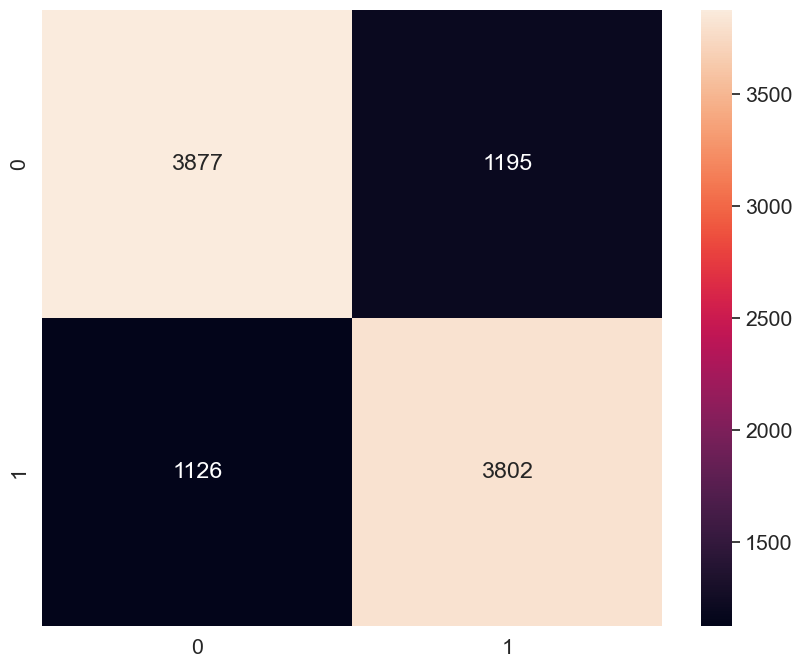

In [53]:
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot = True, fmt='g')
print('accuracy score: %0.4f'%accuracy_score(y_test, y_pred))

In [54]:
from sklearn.model_selection import cross_val_score

In [61]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [69]:
# std deviation is applied to an array - here we get an function and hence cant be multiplied by int again. 
# First convert std dev to float and then multiply
accuracies_std_dev = np.std(accuracies, dtype = np.float64)


In [70]:
accuracies_std_dev

0.004721030078277414

In [71]:
accuracies_std_dev = accuracies_std_dev * 2

In [83]:
# print('Logistic accuracy %0.3f (+/- %0.3f)'% accuracies.mean(), accuracies_std_dev)
print('Logistic accuracy {:.3f}, {:.3f}'.format(accuracies.mean(), accuracies_std_dev))

Logistic accuracy 0.767, 0.009


# formatting results

In [84]:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()

In [85]:
final_results['predicted_results'] = y_pred

In [86]:
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,0.499780,1,1
1,0.870829,1,1
2,-0.817445,0,0
3,-0.148481,1,1
4,0.479132,1,1
...,...,...,...
9995,-0.400893,1,0
9996,-0.883839,1,1
9997,0.579206,0,0
9998,-0.406646,1,1
